# Importing Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Retreiving Data

In [4]:
# Retrieve NSE data
nse_data = yf.download('^NSEI', start='2010-01-01', end='2023-06-01')

# Retrieve NASDAQ data
nasdaq_data = yf.download('^IXIC', start='2010-01-01', end='2023-06-01')
print(nse_data.dropna)
nasdaq_data.dropna

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<bound method DataFrame.dropna of                     Open          High           Low         Close   
Date                                                                 
2010-01-04   5200.899902   5238.450195   5167.100098   5232.200195  \
2010-01-05   5277.149902   5288.350098   5242.399902   5277.899902   
2010-01-06   5278.149902   5310.850098   5260.049805   5281.799805   
2010-01-07   5281.799805   5302.549805   5244.750000   5263.100098   
2010-01-08   5264.250000   5276.750000   5234.700195   5244.750000   
...                  ...           ...           ...           ...   
2023-05-25  18268.900391  18338.099609  18202.400391  18321.150391   
2023-05-26  18368.349609  18508.550781  18333.150391  18499.349609   
2023-05-29  18619.150391  18641.199219  18581.250000  18598.650391   
2023-05-30  18606.650391  18662.449219  18575.500000  1863

<bound method DataFrame.dropna of                     Open          High           Low         Close   
Date                                                                 
2010-01-04   2294.409912   2311.149902   2294.409912   2308.419922  \
2010-01-05   2307.270020   2313.729980   2295.620117   2308.709961   
2010-01-06   2307.709961   2314.070068   2295.679932   2301.090088   
2010-01-07   2298.090088   2301.300049   2285.219971   2300.050049   
2010-01-08   2292.239990   2317.600098   2290.610107   2317.169922   
...                  ...           ...           ...           ...   
2023-05-24  12481.889648  12529.629883  12415.849609  12484.160156   
2023-05-25  12706.440430  12736.919922  12604.889648  12698.089844   
2023-05-26  12736.419922  13001.910156  12729.740234  12975.690430   
2023-05-30  13109.099609  13154.290039  12968.120117  13017.429688   
2023-05-31  12968.379883  13029.080078  12889.370117  12935.290039   

               Adj Close      Volume  
Date            

# Correlation Coefficient

In [5]:
nse_close = nse_data['Close']
nasdaq_close = nasdaq_data['Close']
aligned_data = pd.concat([nse_data['Close'], nasdaq_data['Close']], axis=1, join='inner')
aligned_data.columns = ['NSE', 'NASDAQ']
correlation_coefficient = aligned_data['NSE'].corr(aligned_data['NASDAQ'])
print("Correlation Coefficient: ", correlation_coefficient)


Correlation Coefficient:  0.9511577006729953


# Lead - Lag Plot

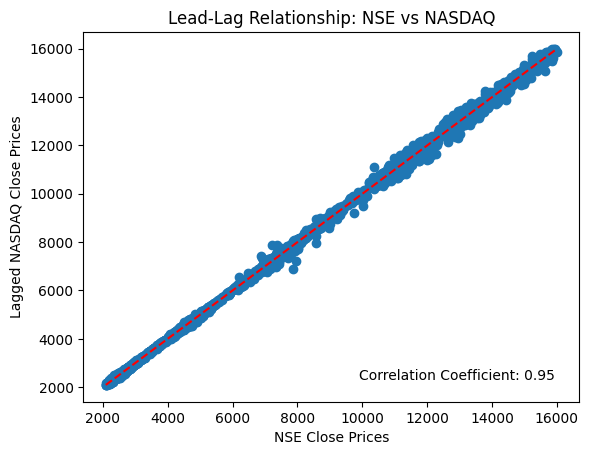

In [6]:
# Calculate the lagged version of NASDAQ close prices
aligned_data['NSE'] = aligned_data['NASDAQ'].shift(1)
# Filter out NaN values from NSE and NASDAQ data
filtered_nse = aligned_data['NSE'][~np.isnan(aligned_data['NSE'])]
filtered_nasdaq = aligned_data['NASDAQ'][~np.isnan(aligned_data['NASDAQ'])]
# Calculate the min and max values for the diagonal line
min_value = min(min(filtered_nse), min(filtered_nasdaq))
max_value = max(max(filtered_nse), max(filtered_nasdaq))
# Plot the lead-lag relationship
plt.scatter(aligned_data['NSE'], aligned_data['NASDAQ'])
plt.xlabel('NSE Close Prices')
plt.ylabel('Lagged NASDAQ Close Prices')
plt.title('Lead-Lag Relationship: NSE vs NASDAQ')
plt.text(0.95, 0.05, f'Correlation Coefficient: {correlation_coefficient:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)
# Add diagonal line
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')
plt.show()

In the above graph we see more number of points below the diagonal line. So from this we can infer that NSE prices are dependent on NASDAQ prices. We can say that NASDAQ leads NSE and hence can be used for parameter optimisation.

# Keltner Channel NASDAQ

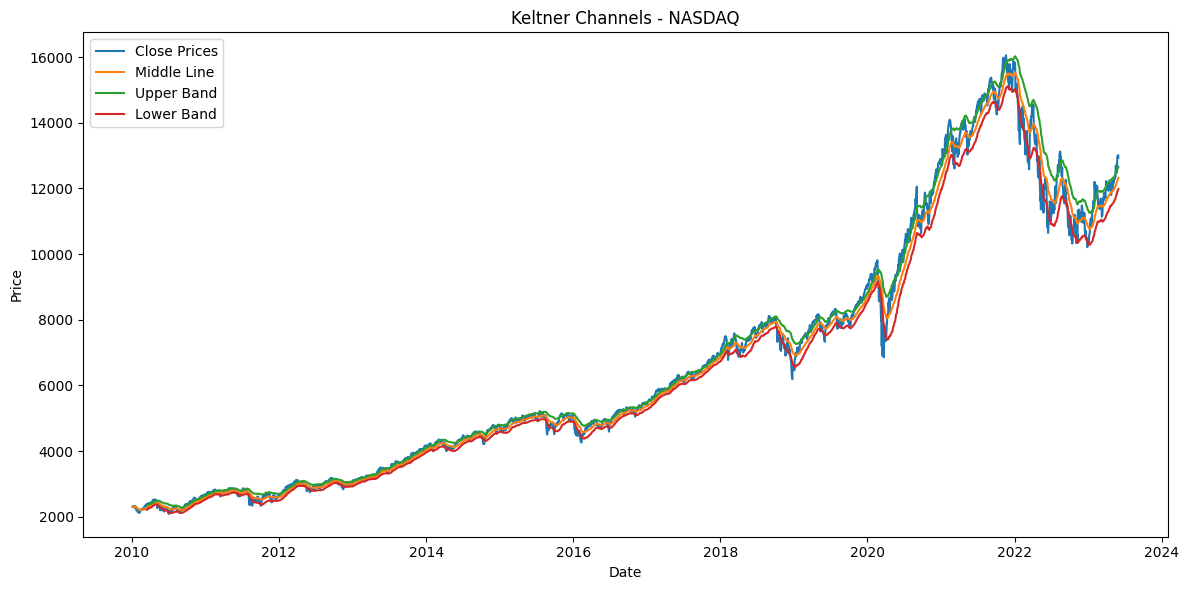

In [7]:
def plot_keltner_channels(data,title,windows=20):
    # Extract the close prices from the data
    close_prices = data['Close']
    high_prices = data['High']
    low_prices = data['Low']

    # Calculate the middle line (EMA) for Keltner Channels
    middle_line = close_prices.ewm(span=windows).mean()

    # Calculate the average true range (ATR)
    true_range = pd.concat([(high_prices - low_prices), abs(high_prices - close_prices.shift(1)), abs(low_prices - close_prices.shift(1))], axis=1).max(axis=1)
    atr = true_range.rolling(window=50).mean()

    # Calculate the upper and lower bands for Keltner Channels
    upper_band = middle_line + (2 * atr)
    lower_band = middle_line - (2 * atr)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(close_prices, label='Close Prices')
    plt.plot(middle_line, label='Middle Line')
    plt.plot(upper_band, label='Upper Band')
    plt.plot(lower_band, label='Lower Band')
    plt.title(f'Keltner Channels - {title}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_keltner_channels(nasdaq_data,'NASDAQ',40)

# BOLLINGER BANDS

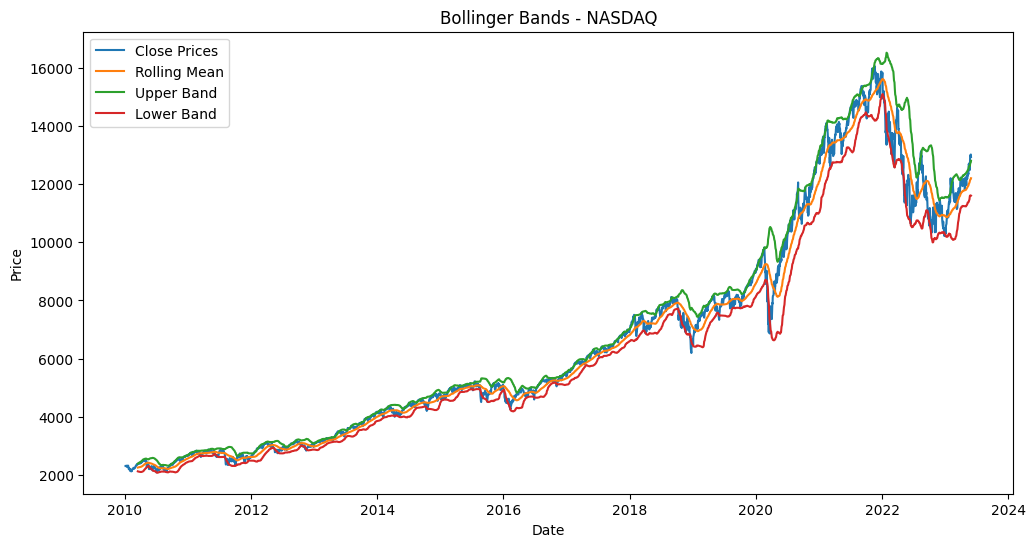

In [8]:
def plot_bollinger_bands(data,title, window=20,std=2):
    # Calculate the rolling mean and standard deviation
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    # Calculate the upper and lower bands
    upper_band = rolling_mean + (std * rolling_std)
    lower_band = rolling_mean - (std * rolling_std)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Prices')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(upper_band, label='Upper Band')
    plt.plot(lower_band, label='Lower Band')
    plt.title(f'Bollinger Bands - {title}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_bollinger_bands(nasdaq_data,'NASDAQ',50,1.87)

# MACD Indicator

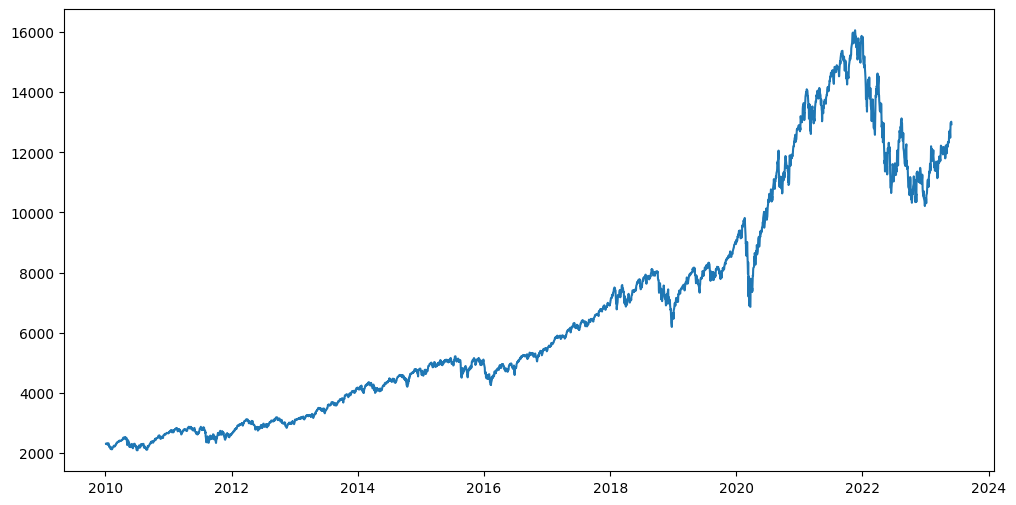

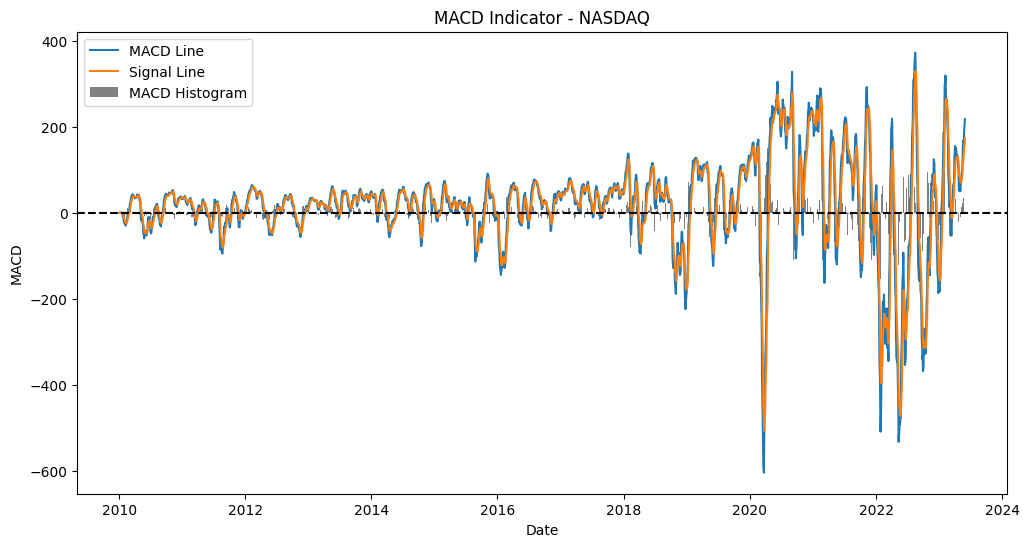

In [12]:
def calculate_macd(data):
    # Calculate the 12-day EMA
    ema_12 = data['Close'].ewm(span=12).mean()

    # Calculate the 26-day EMA
    ema_26 = data['Close'].ewm(span=26).mean()

    # Calculate the MACD line
    macd_line = ema_12 - ema_26

    # Calculate the signal line (9-day EMA of the MACD line)
    signal_line = macd_line.ewm(span=9).mean()

    # Calculate the MACD histogram
    macd_histogram = macd_line - signal_line

    # Return the MACD line, signal line, and MACD histogram as a DataFrame
    macd_data = pd.DataFrame({'MACD Line': macd_line, 'Signal Line': signal_line, 'MACD Histogram': macd_histogram})
    return macd_data

def plot_macd(data,title):
    macd_data = calculate_macd(data)
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Prices')
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(macd_data.index, macd_data['MACD Line'], label='MACD Line')
    plt.plot(macd_data.index, macd_data['Signal Line'], label='Signal Line')
    plt.bar(macd_data.index, macd_data['MACD Histogram'], label='MACD Histogram', color='gray')
    plt.axhline(0, color='black', linestyle='--')
    plt.title(f'MACD Indicator - {title}')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()
    plt.show()
plot_macd(nasdaq_data,'NASDAQ')

# Parameter Optimisation

Parameter Optimisation Keltner Channels

In [13]:
def optimize_keltner_channels(data):
    # Define the parameter range to be tested
    parameter_range = range(10, 31)

    # Initialize an empty DataFrame to store the results
    results = pd.DataFrame(columns=['Parameter', 'Profit'])

    # Iterate over the parameter range
    for parameter in parameter_range:
        # Calculate the Keltner Channels with the current parameter
        middle_line = data['Close'].ewm(span=parameter).mean()
        atr = data['High'] - data['Low']
        upper_band = middle_line + (2 * atr)
        lower_band = middle_line - (2 * atr)

        # Determine the trading signals based on the Keltner Channels
        data['Signal'] = np.where(data['Close'] > upper_band, -1, np.where(data['Close'] < lower_band, 1, 0))

        # Calculate the daily returns
        data['Return'] = data['Close'].pct_change()

        # Calculate the profit based on the trading signals
        data['Profit'] = data['Signal'].shift(1) * data['Return']

        # Calculate the cumulative profit
        cumulative_profit = (1 + data['Profit']).cumprod()[-1]

        # Add the results to the DataFrame
        results.loc[len(results)] = [parameter, cumulative_profit]

    # Find the optimal parameter with the highest profit
    optimal_parameter = results.loc[results['Profit'].idxmax(), 'Parameter']

    # Return the optimal parameter
    return optimal_parameter


# Perform parameter optimization
optimal_parameter_keltner = optimize_keltner_channels(nasdaq_data)

# Print the optimal parameter
print('Optimal Parameter:', optimal_parameter_keltner)

Optimal Parameter: 15.0


Parameter optimistion Bollinger Bands

In [14]:
def calculate_bollinger_bands(data, window):
    # Calculate the rolling mean and standard deviation
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    # Calculate the upper and lower bands
    upper_band = rolling_mean + (2 * rolling_std)
    lower_band = rolling_mean - (2 * rolling_std)

    return upper_band, lower_band

def generate_bollinger_band_signals(data, upper_band, lower_band):
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0

    # Generate buy signals
    signals.loc[data['Close'] < lower_band, 'Signal'] = 1

    # Generate sell signals
    signals.loc[data['Close'] > upper_band, 'Signal'] = -1

    return signals

def calculate_cumulative_profit(data, signals):
    # Calculate daily returns
    daily_returns = data.pct_change()

    # Calculate position returns
    position_returns = daily_returns * signals['Signal'].shift()

    # Calculate cumulative returns
    cumulative_returns = (position_returns + 1).cumprod()

    # Calculate cumulative profit
    cumulative_profit = cumulative_returns.iloc[-1] - 1

    return cumulative_profit

# Define parameter range for optimization
parameter_range = range(5, 31)

# Initialize a list to store the results
results = []

# Loop over the parameter values
for parameter in parameter_range:
    # Calculate Bollinger Bands with the current parameter value
    upper_band, lower_band = calculate_bollinger_bands(nasdaq_data, parameter)

    # Generate buy and sell signals based on Bollinger Bands
    signals = generate_bollinger_band_signals(nasdaq_data, upper_band, lower_band)

    # Calculate cumulative profit
    cumulative_profit = calculate_cumulative_profit(nasdaq_data['Close'], signals)

    # Append the result to the results list
    results.append({'Parameter': parameter, 'Profit': cumulative_profit})

# Convert the results list to a DataFrame
results_df_b = pd.DataFrame(results)

# Find the optimal parameter with the maximum profit
optimal_parameter = results_df_b.loc[results_df_b['Profit'].idxmax(), 'Parameter']

# Print the optimal parameter
print('Optimal Parameter:', optimal_parameter)

Optimal Parameter: 22


Parameter Optimisation MACD

In [15]:
def calculate_macd(data, short_window, long_window, signal_window):
    # Calculate the short-term EMA
    ema_short = data['Close'].ewm(span=short_window).mean()

    # Calculate the long-term EMA
    ema_long = data['Close'].ewm(span=long_window).mean()

    # Calculate the MACD line
    macd_line = ema_short - ema_long

    # Calculate the signal line
    signal_line = macd_line.ewm(span=signal_window).mean()

    # Calculate the MACD histogram
    macd_histogram = macd_line - signal_line

    return macd_line, signal_line, macd_histogram

def generate_macd_signals(data, macd_line, signal_line):
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0

    # Generate buy signals
    signals.loc[(macd_line > signal_line) & (macd_line.shift() <= signal_line.shift()), 'Signal'] = 1

    # Generate sell signals
    signals.loc[(macd_line < signal_line) & (macd_line.shift() >= signal_line.shift()), 'Signal'] = -1

    return signals

# Define parameter ranges for optimization
short_range = range(10, 21)
long_range = range(22, 41)
signal_range = range(5, 16)

# Initialize a list to store the results
results = []

# Loop over the parameter values
for short_window in short_range:
    for long_window in long_range:
        for signal_window in signal_range:
            # Calculate MACD indicator with the current parameter values
            macd_line, signal_line, _ = calculate_macd(nasdaq_data, short_window, long_window, signal_window)

            # Generate buy and sell signals based on MACD indicator
            signals = generate_macd_signals(nasdaq_data, macd_line, signal_line)

            # Calculate cumulative profit
            cumulative_profit = calculate_cumulative_profit(nasdaq_data['Close'], signals)

            # Append the result to the results list
            results.append({'Short Window': short_window, 'Long Window': long_window, 'Signal Window': signal_window, 'Profit': cumulative_profit})

# Convert the results list to a DataFrame
results_df_macd = pd.DataFrame(results)

# Find the optimal parameters with the maximum profit
optimal_parameters = results_df_macd.loc[results_df_macd['Profit'].idxmax(), ['Short Window', 'Long Window', 'Signal Window']]

# Print the optimal parameters
print('Optimal Parameters:')
print(optimal_parameters)

Optimal Parameters:
Short Window     16.0
Long Window      25.0
Signal Window    13.0
Name: 1295, dtype: float64


# Signal Generation

In [75]:
buy_kc=[]
sell_kc=[]
def generate_keltner_signals(data):
    close_prices = data['Close']
    high_prices = data['High']
    low_prices = data['Low']

    # Calculate the middle line (EMA) for Keltner Channels
    middle_line = close_prices.ewm(span=optimal_parameter_keltner).mean()

    # Calculate the average true range (ATR)
    true_range = pd.concat([(high_prices - low_prices), abs((high_prices - close_prices.shift(1))), abs((low_prices - close_prices.shift(1)))], axis=1).max(axis=1)

    atr = true_range.rolling(window=50).mean()

    # Calculate the upper and lower bands for Keltner Channels
    upper_band = middle_line + (2 * atr)
    lower_band = middle_line - (2 * atr)
    signals = []
    position = 0

    for i in range(len(close_prices)):
        if close_prices[i] > upper_band[i] and position != 1:
            signals.append(close_prices[i])
            buy_kc.append(close_prices[i])
            position = 1
        elif close_prices[i] < lower_band[i] and position == 1:
            signals.append(-close_prices[i])
            sell_kc.append(close_prices[i])
            position = 0
        else:
            signals.append(0)
       
    return signals

def calculate_cumulative_returns(signals, close_prices):
    positions = [0]  # Start with 0 position
    for i in range(1, len(signals)):
        if signals[i] > 0:
            positions.append(1)  # Buy signal, hold long position
        elif signals[i] < 0:
            positions.append(0)  # Sell signal, exit position
        else:
            positions.append(positions[-1])  # No signal, hold previous position

    returns = close_prices.pct_change()  # Calculate daily returns
    cumulative_returns = (returns * positions).cumsum()  # Calculate cumulative returns

    return cumulative_returns


keltner_signals = generate_keltner_signals(nse_data)
cumulative_returns = calculate_cumulative_returns(keltner_signals, nse_data['Close'])
print('Cumulative Return for Keltner is',(cumulative_returns[-1])*100,'%')
keltner_signals
sell_kc
def MDD(buy,sell):
    max_buy= buy[0]
    MDD=0
    MDD_pct=0
    for j in range(len(sell)):
        if max_buy-sell[j]>MDD:
            MDD=max_buy-sell[j]
            MDD_pct=MDD/max_buy
        if buy[j] > max_buy:
            max_buy = buy[j]
            
    return MDD_pct
print('Maximum Drawdown for Keltner is',-MDD(buy_kc,sell_kc)*100,'%')



Cumulative Return for Keltner is 133.74170257100334 %
Maximum Drawdown for Keltner is -8.443579228738715 %


In [77]:
def bollinger_band_strategy(data,window_size):
    buy_signals = []
    sell_signals = []
    rolling_mean = data['Close'].rolling(window=window_size).mean()
    rolling_std = data['Close'].rolling(window=window_size).std()
    upper_band = rolling_mean + (2 * rolling_std)
    lower_band = rolling_mean - (2 * rolling_std)
    for i in range(window_size, len(data)):
        if data['Close'][i] > upper_band[i - 1] and data['Close'][i - 1] <= upper_band[i - 1]:
            buy_signals.append(i)
        elif data['Close'][i] < lower_band[i - 1] and data['Close'][i - 1] >= lower_band[i - 1]:
            sell_signals.append(i)
    return buy_signals, sell_signals

# Apply the strategy to NSE data
nse_buy_signals, nse_sell_signals = bollinger_band_strategy(nse_data,22)
print('Maximum Drawdown for Bollinger is',-MDD(nse_buy_signals,nse_sell_signals)*100,'%')


Maximum Drawdown for Bollinger is -6.049149338374291 %


In [79]:
buy_macd=[]
sell_macd=[]
def macd_strategy(data):
    close_prices = data['Close']

    # Calculate the MACD line (12-day EMA minus 26-day EMA)
    ema_16 = close_prices.ewm(span=16).mean()
    ema_25 = close_prices.ewm(span=25).mean()
    macd_line = ema_16 - ema_25

    # Calculate the signal line (9-day EMA of MACD line)
    signal_line = macd_line.ewm(span=13).mean()

    # Generate signals based on the MACD crossover
    signals = []
    position = 0

    for i in range(len(data)):
        if macd_line[i] > signal_line[i] and position != 1:
            signals.append('Buy')
            buy_macd.append(close_prices[i])
            position = 1
        elif macd_line[i] < signal_line[i] and position == 1:
            signals.append('Sell')
            sell_macd.append(close_prices[i])
            position = 0
        else:
            signals.append('Hold')

    return signals


# Evaluate the MACD strategy using cumulative returns
def evaluate_strategy(data, signals):
    close_prices = data['Close']
    returns = close_prices.pct_change()
    strategy_returns = [returns[i] if signal == 'Buy' else -returns[i] if signal == 'Sell' else 0 for i, signal in enumerate(signals)]
    cumulative_returns = np.cumsum(strategy_returns)

    return cumulative_returns

# Generate signals using the MACD strategy
macd_signals = macd_strategy(nse_data)

# Evaluate the strategy using cumulative returns
cumulative_returns = evaluate_strategy(nse_data, macd_signals)

print('Cumulative Return for MACD is',(cumulative_returns[-1])*100,'%')
print('Maximum Drawdown for MACD is',MDD(buy_macd,sell_macd)*100,'%')


Cumulative Return for MACD is 161.15804857828272 %
Maximum Drawdown for MACD is 14.21296155277401 %
